In [1]:
%run "initialization.ipynb"
%run "Input_selection_functions.ipynb"
%run "Downsampling_and_outliers_functions.ipynb"
%run "Stitching_clean.ipynb"
%run "Visualization_functions.ipynb"
%run "Evaluation_functions.ipynb"
%run "Meshing_functions.ipynb"
%load_ext autoreload

----------------------------------------
loaded variables from initialization file: 
> myparams, myconfiguration_file
> list_picked_id_source, list_picked_id_target
> data_folder
----------------------------------------


In this notebook we use combined methods from previous to get to a point in which we can compare the result we obtained with the model, either as point clouds either as meshes.

# THE MODEL

## load solid file ".stl"

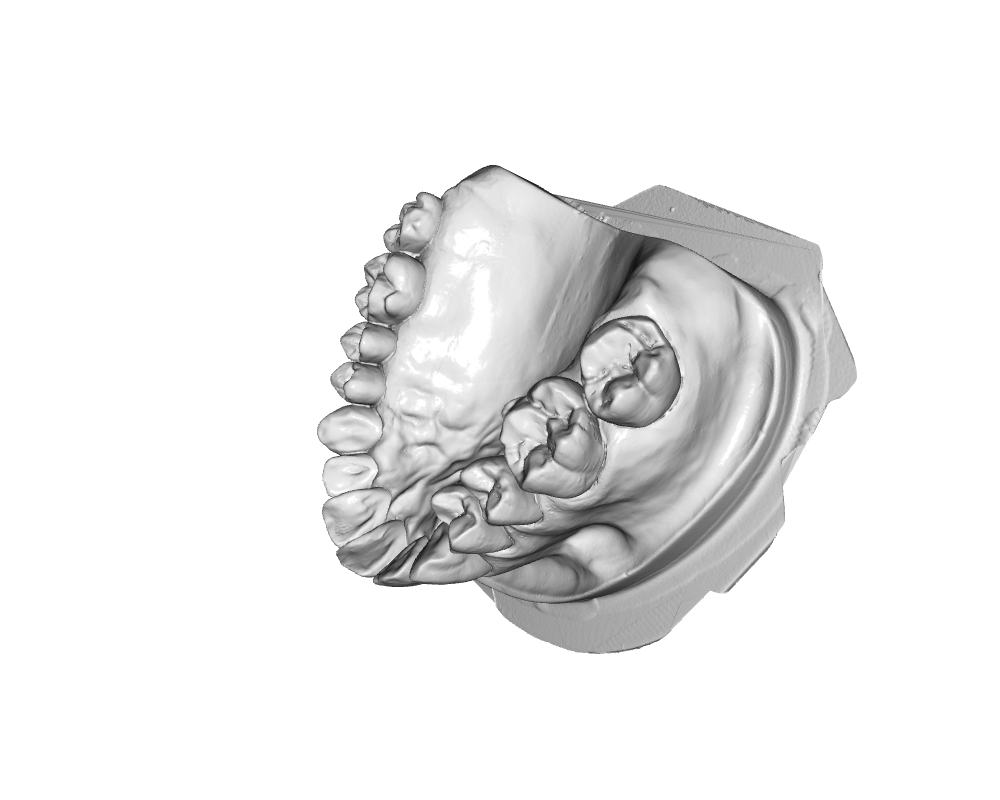

In [2]:
model_mesh = o3d.io.read_triangle_mesh("../data/"+"dental.stl")
model_mesh.compute_vertex_normals()
#o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)
custom_draw_geometry([model_mesh],
                     mytitle = "original model",
                     #params = myparams,  
                     #configuration_file = myconfiguration_file, 
                     take_screen_shot = True,
                     rotate = False)
Im(filename=last_file(".png"),
  width = 600, height = 400) 

## convert it to point cloud

In [3]:
model_pcd = o3d.geometry.PointCloud()
model_pcd.points = model_mesh.vertices
model_pcd.colors = model_mesh.vertex_colors
model_pcd.normals = model_mesh.vertex_normals

## visualize it 

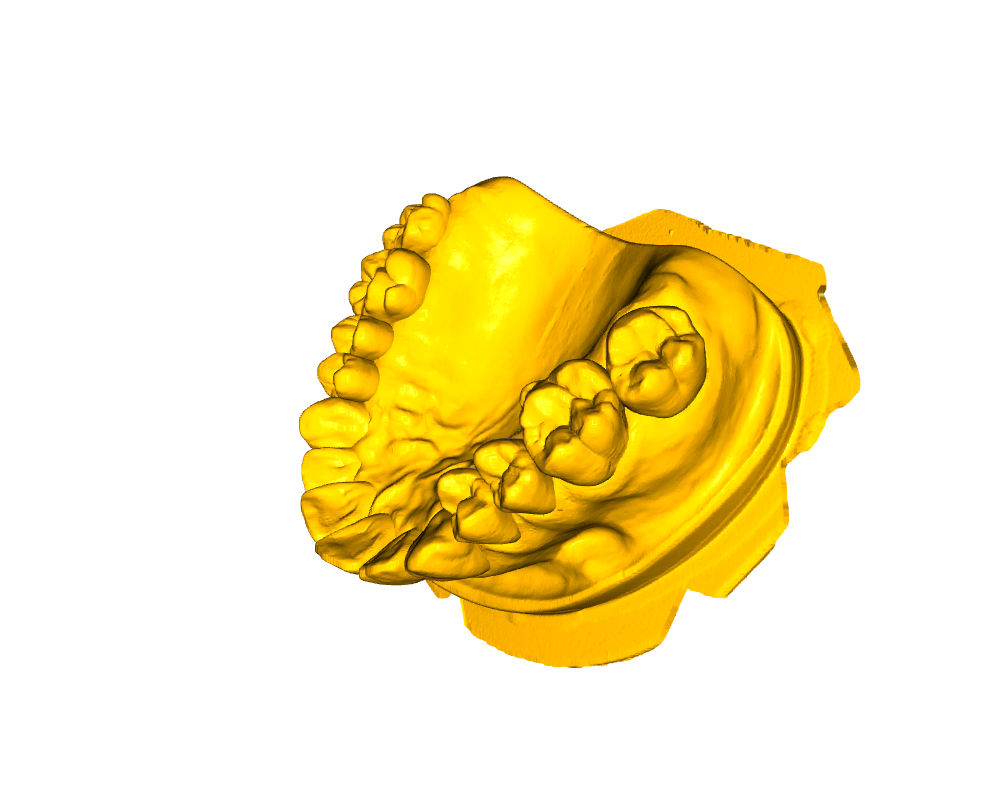

In [4]:
model_pcd.paint_uniform_color([1, 0.706, 0])
custom_draw_geometry(model_pcd,
                     mytitle = "original_model_pcd",
                     #params = myparams,  # parameter for camera point view, json file via pressing P
                     #configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False)
Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [5]:
print (f"model_pcd contains {len(np.asarray(model_pcd.points))} points")

model_pcd contains 3379896 points


Found 0 files containing ../data/full_scaled_model with extension .pcd


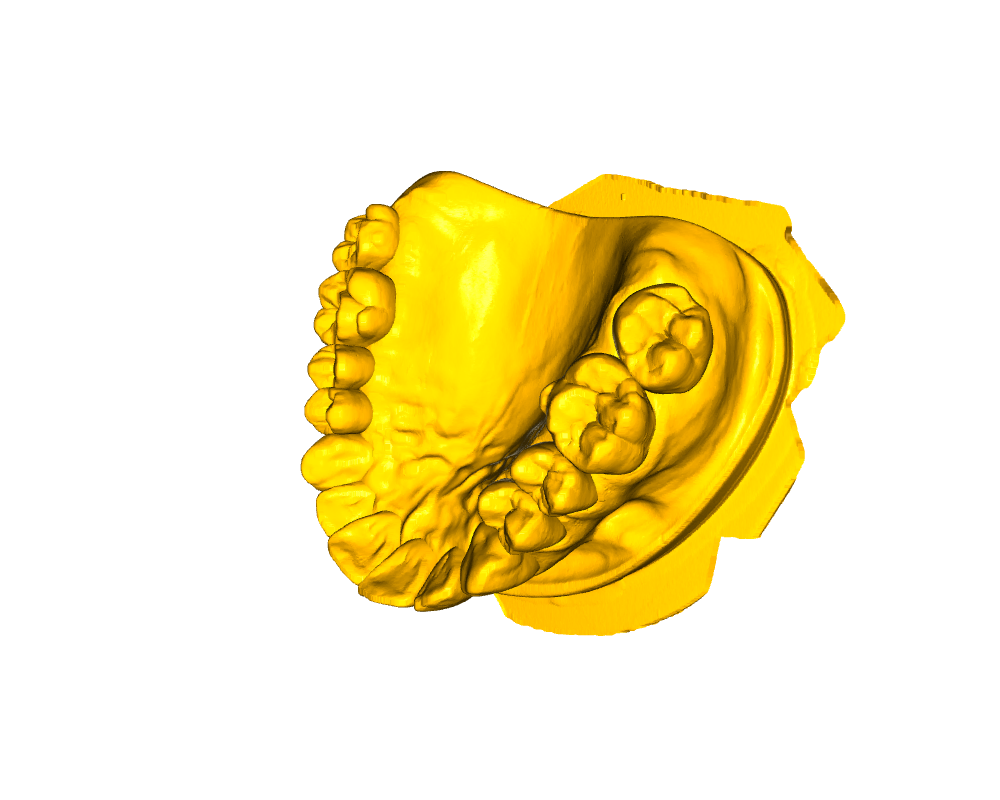

In [6]:
filesearch = last_file_containing("../data/"+"full_scaled_model", ".pcd")
if filesearch is None:
    scale_factor = 1000
    trans_scale = np.asarray([[scale_factor, 0.0, 0.0, 0.0], 
                                 [0.0, scale_factor, 0.0, 0.0],
                                 [0.0, 0.0, scale_factor, 0.0], 
                                 [0.0, 0.0, 0.0, 1.0]])

    temp_model_mesh = copy.deepcopy(model_pcd)
    temp_model_mesh.transform(trans_scale)
    
    #save
    o3d.io.write_point_cloud("../data/"+"full_scaled_model.pcd", temp_model_mesh)


name = "full_scaled_model.pcd"  
scaled_model= o3d.io.read_point_cloud("../data/"+name)
scaled_model = scaled_model.paint_uniform_color([1, 0.706, 0]) 
custom_draw_geometry(scaled_model,
                     mytitle = "full_scaled_model",
                     #params = myparams,  # parameter for camera point view, json file via pressing P
                     #configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file_containing("full_scaled_model",".png"),
  width = 500, height = 400) 

## elaborate the model

In [28]:
# CROP THE MODEL
temp_model_mesh = copy.deepcopy(model_mesh)
demo_crop_geometry(temp_model_mesh)

Demo for manual geometry cropping
1) Press 'Y' twice to align geometry with negative direction of y-axis
2) Press 'K' to lock screen and to switch to selection mode
3) Drag for rectangle selection,
   or use ctrl + left click for polygon selection
4) Press 'C' to get a selected geometry and to save it
5) Press 'F' to switch to freeview mode


PointCloud with 129071 points.


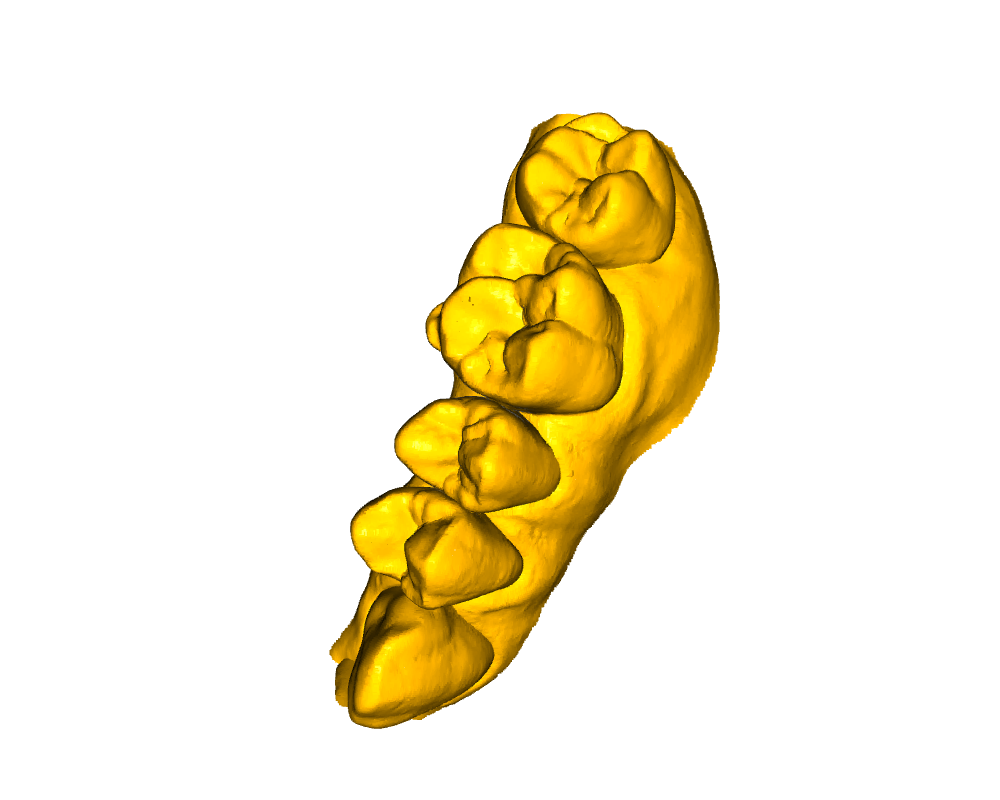

In [7]:
# LOAD MODEL CROPPED as PointCloud
last_model_cropped = o3d.io.read_point_cloud(
                                            last_file_containing("model_cropped", extension = '.ply')
                                            )
last_model_cropped.paint_uniform_color([1, 0.706, 0])                                            
print (last_model_cropped)
custom_draw_geometry(last_model_cropped,
                     mytitle = "Model_cropped",
                     #params = myparams, 
                     #configuration_file = myconfiguration_file, 
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [12]:
filesearch = last_file_containing("scaled_model_cropped", ".pcd")
filesearch

Found 0 files containing scaled_model_cropped with extension .pcd


## Scaling

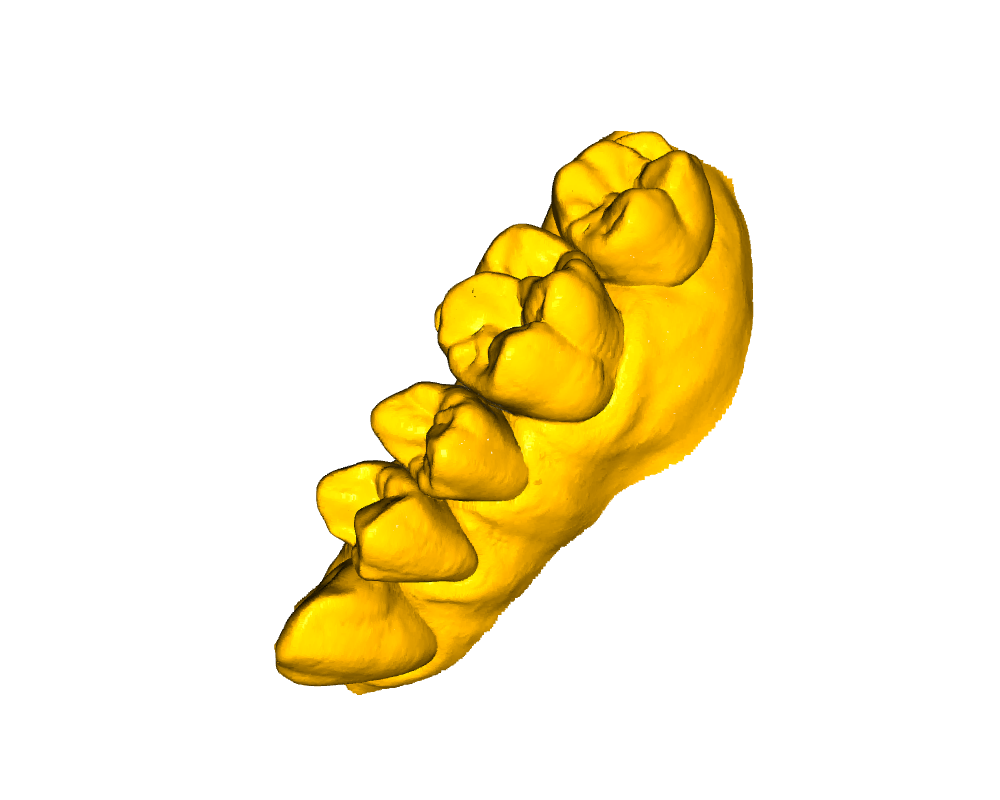

In [8]:
if filesearch is None:
    scale_factor = 1000
    trans_scale = np.asarray([[scale_factor, 0.0, 0.0, 0.0], 
                                 [0.0, scale_factor, 0.0, 0.0],
                                 [0.0, 0.0, scale_factor, 0.0], 
                                 [0.0, 0.0, 0.0, 1.0]])

    temp_model_mesh = copy.deepcopy(last_model_cropped)
    temp_model_mesh.transform(trans_scale)
    
    #save
    o3d.io.write_point_cloud("../data/"+"scaled_model_cropped.pcd", temp_model_mesh)


name = "scaled_model_cropped.pcd"  #for cropped one. "cropped_6.ply"
scaled_model_cropped= o3d.io.read_point_cloud("../data/"+name)
scaled_model_cropped = scaled_model_cropped.paint_uniform_color([1, 0.706, 0]) 
custom_draw_geometry(scaled_model_cropped,
                     mytitle = "scaled_model_cropped",
                     #params = myparams,  # parameter for camera point view, json file via pressing P
                     #configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file_containing("scaled_model_cropped",".png"),
  width = 500, height = 400) 

* scaled_model_cropped is a POINT CLOUD that we can use to compare to our point cloud

# Compare the model to our results

we can use either the mesh, which is elaborated, or the last pointcloud after cluster removal.

## 1- Comparing Point Cloud to Point Cloud

### Load reconstructed point cloud

After cluster cleaning 

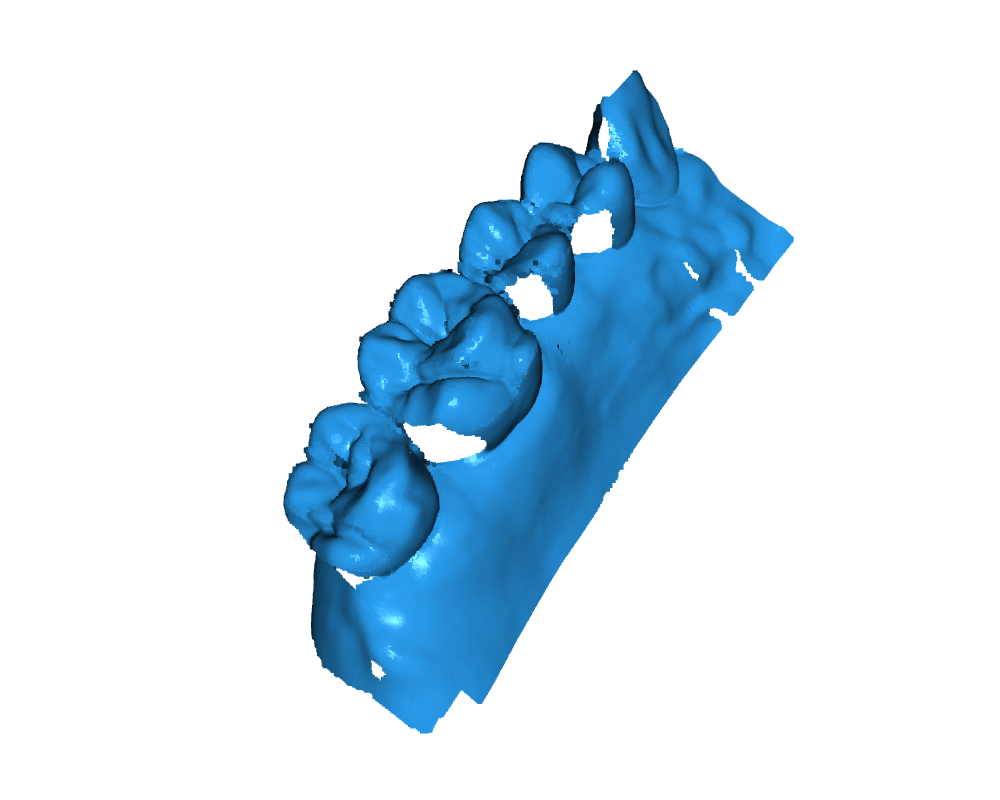

In [10]:
full_st_pcd= o3d.io.read_point_cloud("../data/"+"complete_cluster_3.pcd")
custom_draw_geometry(full_st_pcd,
                     mytitle = "complete_cluster_3",
                     #params = myparams, 
                     #configuration_file = myconfiguration_file,
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file(".png"),
  width = 500, height = 400) 

To speed up the process and make it easy for the p2p icp registration, we use a cropped version of our point cloud.

In [31]:
# CROP 
temp_st_pcd = copy.deepcopy(full_st_pcd)
demo_crop_geometry(temp_st_pcd)

Demo for manual geometry cropping
1) Press 'Y' twice to align geometry with negative direction of y-axis
2) Press 'K' to lock screen and to switch to selection mode
3) Drag for rectangle selection,
   or use ctrl + left click for polygon selection
4) Press 'C' to get a selected geometry and to save it
5) Press 'F' to switch to freeview mode


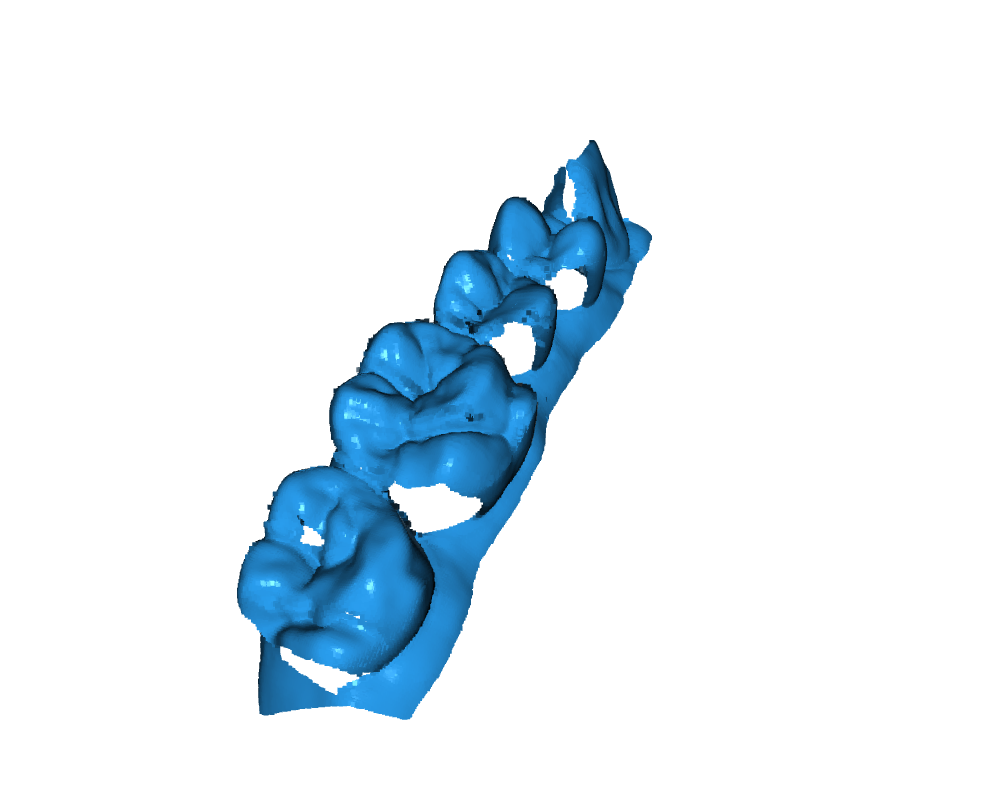

In [9]:
#LOAD
st_pcd= o3d.io.read_point_cloud("../data/"+"upcropped_1.ply")
custom_draw_geometry(st_pcd,
                     mytitle = "upcropped_1",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file_containing("upcropped_1",".png"),
  width = 500, height = 400) 

In [14]:
list_stitches = [scaled_model_cropped ,st_pcd]
lables = ["model_pc","stitched_pc"]

In [15]:
# number of point clouds
get_num_points(list_stitches, print_statement = True)

number of points in clouds
(0, 129071)
(1, 327545)


[129071, 327545]

Note that we are working on heavily downsampled models

In [16]:
## create list of improving transformations 
list_cool_transformations = []
list_picked_id_source = []
list_picked_id_target = []

### execute manual registration p2p icp

in the visualization you need to pick 3 (and only 3) points in each geometry, try to zoom in and be "precise"

In [18]:
transf,new_picked_id_source,new_picked_id_target,registration,list_stitches = full_evaluation_pipeline(
                                                                             #input 
                                                                             list_stitches = list_stitches,
                                                                             labels_stitches = lables,
                                                                             color_stitches = [[1, 0.706, 0],[0, 0.651, 0.929]],

                                                                             #plotting 
                                                                             params = myparams,  # parameter for camera point view, json file via pressing P
                                                                             configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                                                                             take_screen_shot = True,
                                                                             rotate = False,
                                                                             onewindow = True,

                                                                             #scaling
                                                                             scaling_needed = False,
                                                                             scale_factor = 1000,
    
                                                                             #downsampling
                                                                             voxels = [0.1,0.2],

                                                                             #evaluation 
                                                                             threshold = 0.03,
                                                                             #picked_id_source = list_picked_id_source[1],
                                                                             #picked_id_target = list_picked_id_target[1],

                                                                             #statements
                                                                             print_statements = True,
                                                                             visualization_on = True
                                                                            )

(255, 180.03, 0)
(0, 166.005, 236.895)
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #26955 (-35., -19., 43.) to add in queue.
[Open3D INFO] Picked point #66329 (-31., -17., 42.) to add in queue.
[Open3D INFO] Picked point #12638 (-31., -24., 42.) to add in queue.

[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #16853 (12., 4.8, 43.) to add in queue.
[Open3D INFO] Picked point #16857 (11., 2.3, 39.) to add in queue.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #15941 (5.5, 5.2, 40.) to add in

In [20]:
list_picked_id_source.append(new_picked_id_source)
list_picked_id_target.append(new_picked_id_target)

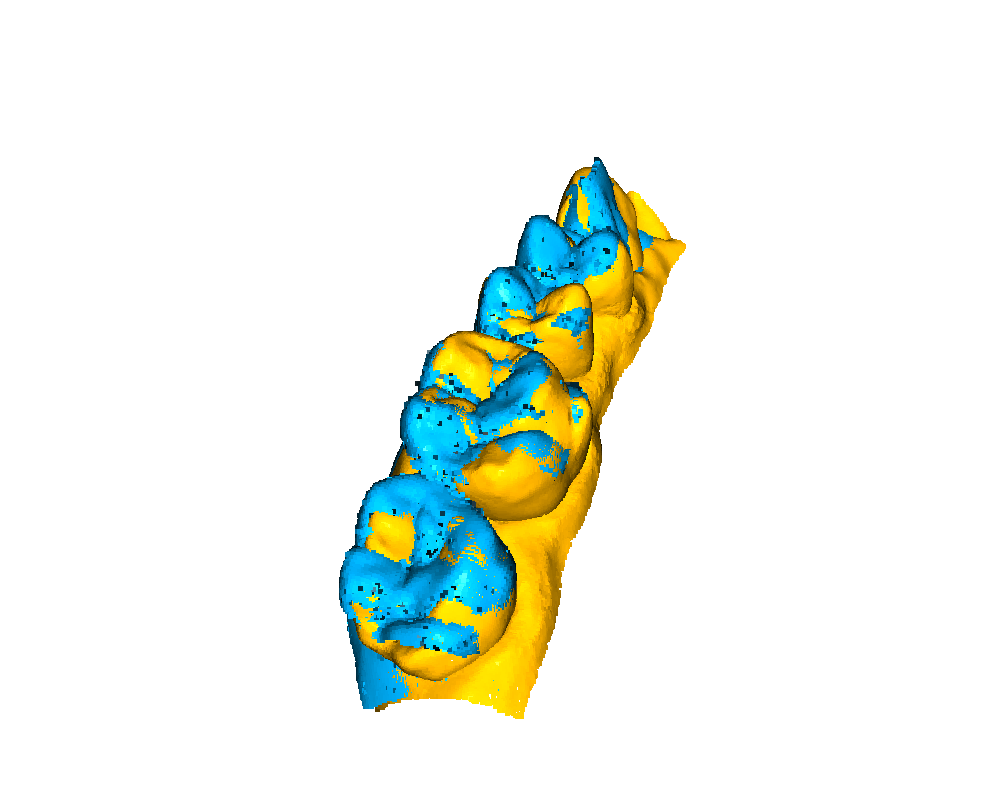

In [23]:
Im(filename=last_file_containing("p2point_stitch",".png"),
  width = 800)#, height = 400) 

We notice that this is only an approximate transformation... can we make it better? maybe feeding it as initial transformation to the traditional ICP?

In [24]:
# append to list of transformations
list_cool_transformations.append(transf)

### Visualize how the last transformation looks on the full point cloud model and full stitch

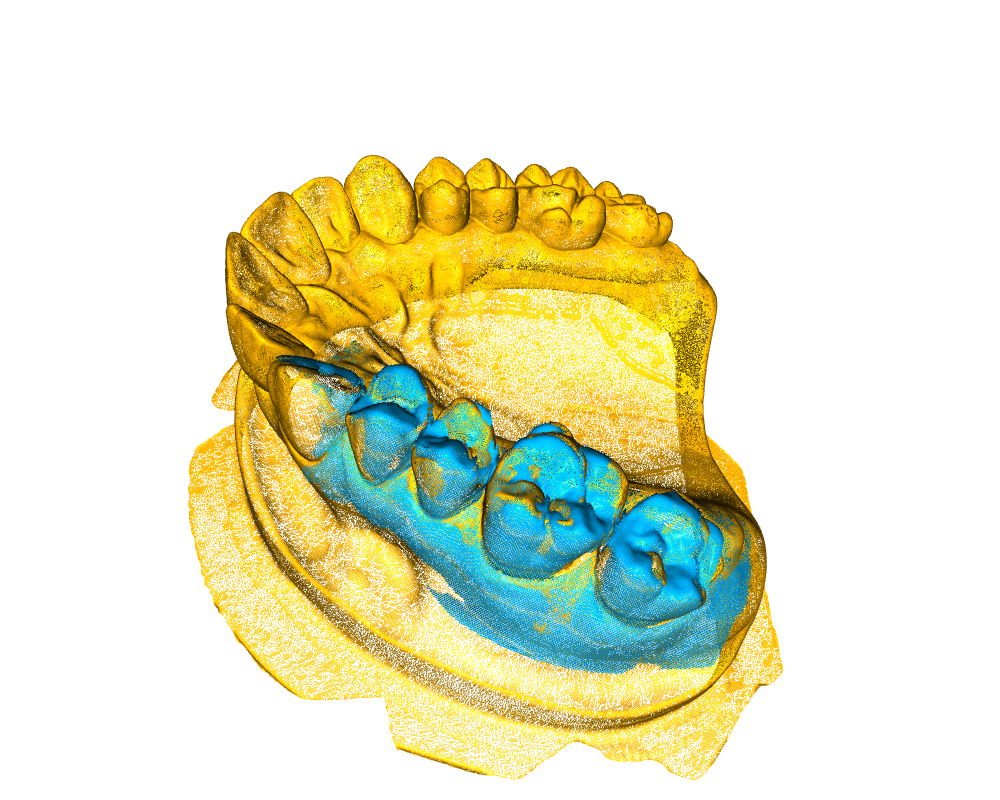

In [25]:
#build the final newpointcloud and eventually save it
stitched_model_reconstruction = save_registration_result(scaled_model, 
                                         full_st_pcd, 
                                         list_cool_transformations[-1], 
                                         title = "icp_manual_registration_full_pcls", 
                                         save_result = True,
                                         visualize_result = True)
## if you have printed an image of the last visualization you can see it here
Im(filename=last_file_containing("icp_manual_registration_full_pcls", ".png"),
  width = 500, height = 400) 

In [44]:
# to ease recording 
custom_draw_geometry(stitched_model_reconstruction,
                     mytitle = "stitched_model_reconstruction",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = False,
                     rotate = "interactive")

[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.
[Open3D WARNING] GLFW Error: The GLFW library is not initialized


### Improve alignment

After getting an approximate solution with the manual alignment, we feed the found transformation in further icp. 

In [45]:
results_improving_icp = []

In [46]:
print(len(list_cool_transformations))

1


--------------------------------------------------------------------------------
iteration 1
model_pc PointCloud with 3379896 points.
stitched_pc PointCloud with 488502 points.
PointCloud with 509294 points.
PointCloud with 293729 points.
removing outliers

POINT-TO-PLANE ICP registration is applied on original point
distance threshold 0.200.
number of points in clouds
(0, 509294)
(1, 293729)
Transformation is:
[[ -0.43750001   0.89020272  -0.12701519  18.75111112]
 [ -0.73495091  -0.4353792   -0.51989624  -6.23577505]
 [ -0.51811282  -0.13410468   0.84473371 -14.53117461]
 [  0.           0.           0.           1.        ]]
overlapping points :  59001
RegistrationResult with fitness=1.158486e-01, inlier_rmse=1.156833e-01, and correspondence_set size of 59001
Access transformation to get result.


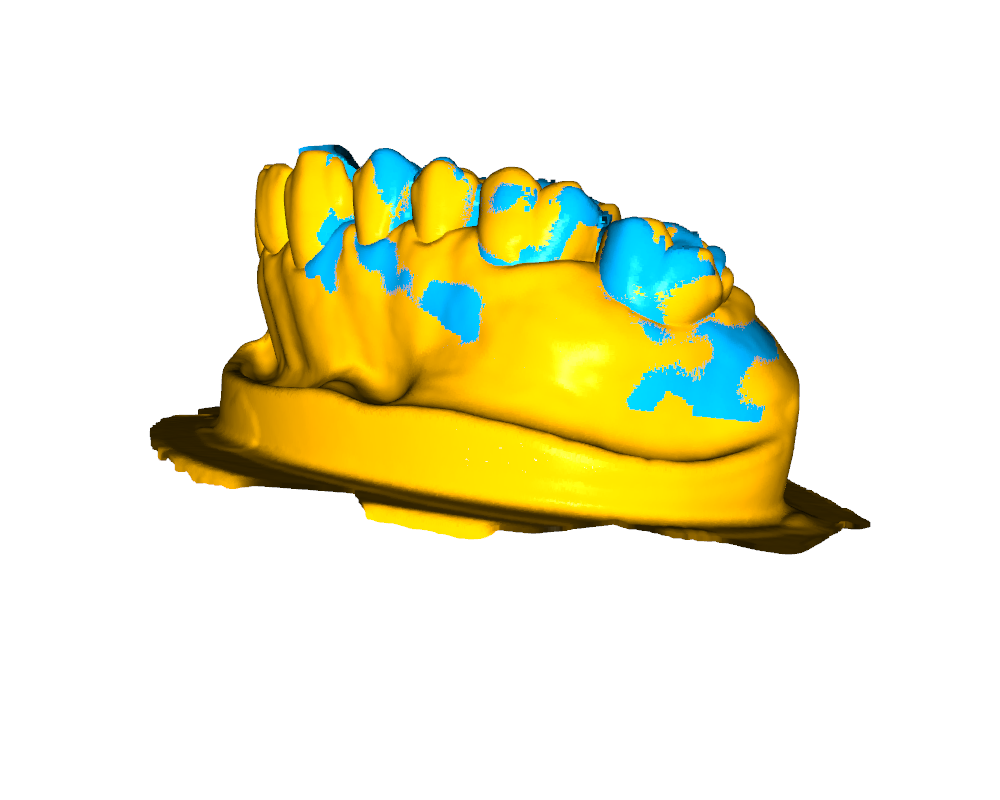

In [47]:
num_iterations = 1
for i in range(num_iterations):
    print (dash)
    print (f"iteration {i+1}")
    improving_manual_icp([scaled_model,full_st_pcd],
                         list_cool_transformations,
                         results_improving_icp,
                         downsample_voxel_size = 0.05,
                         voxel_size=0.1,

                         visualization_on = False,
                         print_statements = True
                        )


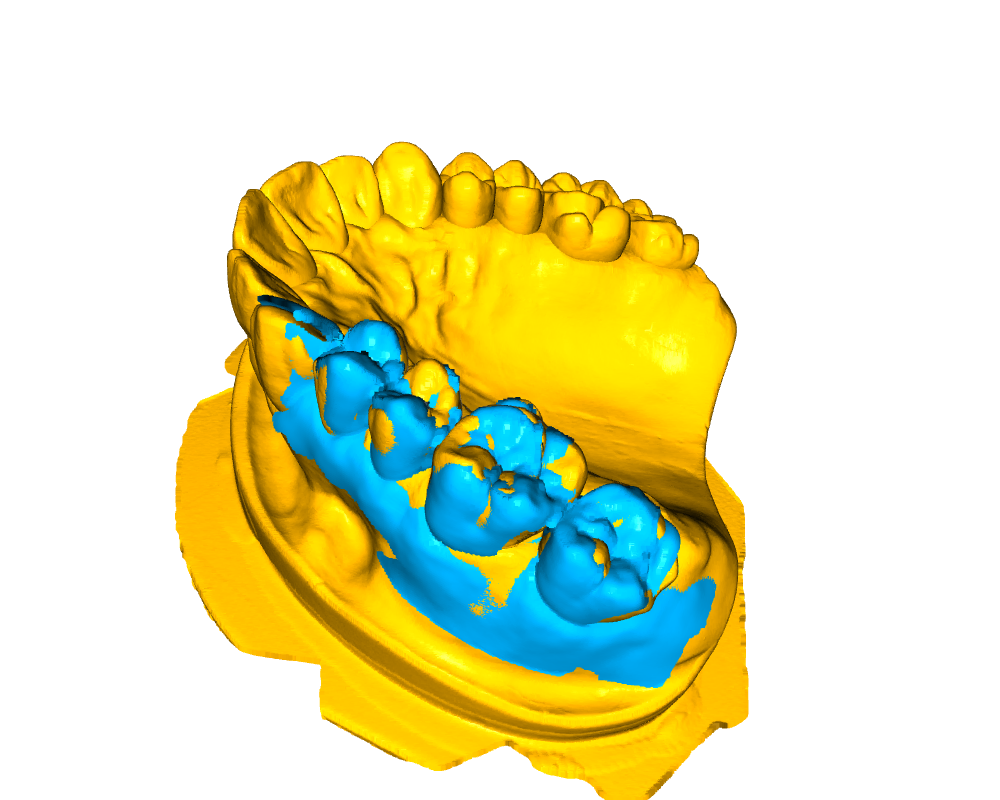

In [26]:
#build the final newpointcloud and eventually save it
final_pcl = save_registration_result(scaled_model, 
                                         full_st_pcd, 
                                         list_cool_transformations[-1], 
                                         title = "improved_icp_full_pcls", 
                                         save_result = True,
                                         visualize_result = True)
## if you have printed an image of the last visualization you can see it here
Im(filename=last_file_containing("improved_icp_full_pcls", ".png"),
  width = 500, height = 400) 

In [49]:
list_cool_transformations[-1]

array([[ -0.43750001,   0.89020272,  -0.12701519,  18.75111112],
       [ -0.73495091,  -0.4353792 ,  -0.51989624,  -6.23577505],
       [ -0.51811282,  -0.13410468,   0.84473371, -14.53117461],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

In [50]:
tstring = mytimestamp()

custom_draw_geometry(final_pcl,
                     mytitle = tstring+ "improved_icp_full_pcls",
                     #params = myparams,  
                     #configuration_file = myconfiguration_file, 
                     take_screen_shot = False,
                     rotate = "interactive")

# after manual changing in visualization mode
#newest = last_file_containing(tstring+"improved_icp_full_pcls", extension = '.png')
#Im(filename=newest,width = 800)

[Open3D WARNING] GLFW Error: The GLFW library is not initialized


## trying recording

#### NOTE :IT WORKS BUT KILLS THE KERNEL AFTER EXECUTION.

In [19]:
list_stitches = [scaled_model_cropped ,st_pcd]
lables = ["model_pc","stitched_pc"]

In [20]:
transf,new_picked_id_source,new_picked_id_target,registration,list_stitches = full_evaluation_pipeline_with_recording(
                                                                             #input 
                                                                             list_stitches = list_stitches,
                                                                             labels_stitches = lables,
                                                                             color_stitches = [[1, 0.706, 0],[0, 0.651, 0.929]],

                                                                             #plotting 
                                                                             params = myparams,  # parameter for camera point view, json file via pressing P
                                                                             configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                                                                             take_screen_shot = True,
                                                                             rotate = False,
                                                                             onewindow = True,

                                                                             #scaling
                                                                             scaling_needed = False,
                                                                             scale_factor = 1000,
    
                                                                             #downsampling
                                                                             voxels = [0.1,0.2],

                                                                             #evaluation 
                                                                             threshold = 0.03,
                                                                             #picked_id_source = list_picked_id_source[1],
                                                                             #picked_id_target = list_picked_id_target[1],

                                                                             #statements
                                                                             print_statements = True,
                                                                             visualization_on = True
                                                                            )

(255, 180.03, 0)
(0, 166.005, 236.895)
[Open3D INFO] Picked point #21476 (-35., -19., 44.) to add in queue.
[Open3D INFO] Picked point #37114 (-30., -17., 42.) to add in queue.
[Open3D INFO] Picked point #9271 (-27., -28., 42.) to add in queue.

[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #275 (12., 5.4, 43.) to add in queue.
[Open3D INFO] Picked point #2874 (11., 2.0, 39.) to add in queue.
[Open3D INFO] Picked point #14251 (0.74, 5.2, 39.) to add in queue.

[21476, 37114, 9271]
Compute a rough transform using the correspondences given by user
Perform point-to-point ICP refinement
RegistrationResult with fitness=0.000000e+00, inlier_rmse=0.000000e+00, and correspondence_set size of 0
Access transformation to get result.

RegistrationResult with fitness=0.000000e+00, inlier_rmse=0.000000e+00, and correspondence_set size of 0
Access transformation to get result.
[[ -0.46501965   0.86769774  -0.17566262  19.53445481]
 [ -0.71669898  -0.48545585  -0.50067474  -6.9959

# 2 -Compare the meshes

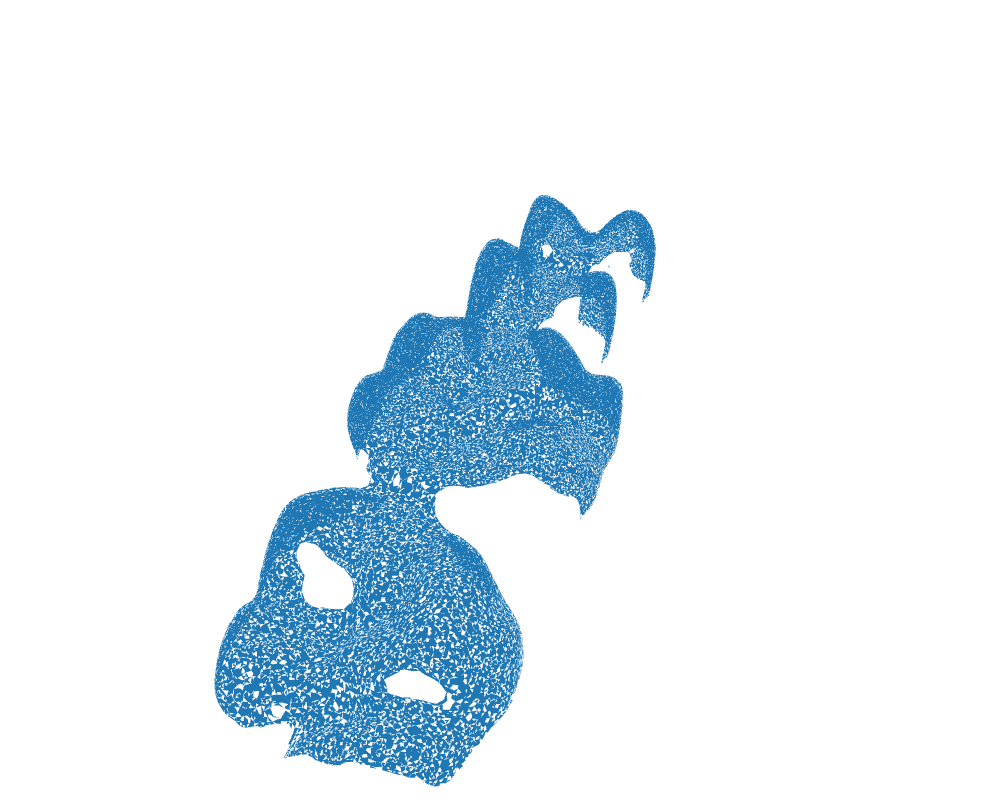

In [143]:
name = "cropped_6.ply"  #for cropped one. "cropped_6.ply" # complete_cluster_3.pcd
reconstructed_mesh_out=  o3d.io.read_triangle_mesh(name)
custom_draw_geometry(reconstructed_mesh_out,
                     mytitle = "cropped_6.ply",
                     #params = myparams,  # parameter for camera point view, json file via pressing P
                     #configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file_containing("../data/"+name,".png"),
  width = 500, height = 400) 

Open3D does not seem to have a way to compare direclty one point cloud with a mesh or two meshes. Trimesh might have more options in this sense, but we havent had the time to dig into this other package. 

## Hausdorf/Euclidean Distance + Local Error

#### Setup

In [71]:
#copy,m transform and recolor point clouds

model_pcd_copy = copy.deepcopy(scaled_model)
st_pcd_copy = copy.deepcopy(full_st_pcd)
model_mesh_copy = copy.deepcopy(model_mesh)

model_mesh_copy.scale(1000, [0,0,0])
model_mesh_copy.transform(list_cool_transformations[-1])

model_pcd_copy.transform(list_cool_transformations[-1])
model_pcd_copy.paint_uniform_color([0.7,0.7,0.7])

PointCloud with 3379896 points.

In [62]:
o3d.visualization.draw_geometries([model_pcd_copy, st_pcd_copy])

#### Error Baseling

Creating a baseline for the metrics. Due to noise in the point cloud there will always be a little errer. This helps to put things in context.

In [93]:
#crop to same excerpt as the stitcht point cloud
boundingbox = o3d.geometry.OrientedBoundingBox.create_from_points(st_pcd_copy.points)
cropped_mesh = copy.deepcopy(model_mesh_copy).crop(boundingbox) 

model_baseline_pcd = cropped_mesh.sample_points_uniformly(200000)

In [94]:
o3d.visualization.draw_geometries([model_pcd_copy, model_baseline_pcd])

In [95]:
#Metrics Baseline
print("Baseline:")

dists_baseline = np.asarray(model_baseline_pcd.compute_point_cloud_distance(model_pcd_copy))
print("Hausdorff:", max(dists_baseline))
print("Median:", np.median(dists_baseline))
print("Mean:", np.mean(dists_baseline))
print("Mean Squared Error:", np.mean(dists_baseline*dists_baseline))

Baseline:
Hausdorff: 0.1852848083765148
Median: 0.04498095252836608
Mean: 0.04874889100352516
Mean Squared Error: 0.003093290261792731


In [96]:
#Visualization of local error
colors = [np.array([1,0,0])*d + np.array([0,1,0])*(1-d) for d in dists_baseline]
model_baseline_pcd.colors = o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([model_pcd_copy,model_baseline_pcd])

#### Stitching Error

In [97]:
#Metrics
dists_stitching = np.asarray(st_pcd_copy.compute_point_cloud_distance(model_pcd_copy))
print("Hausdorff:", max(dists_stitching))
print("Median:", np.median(dists_stitching))
print("Mean:", np.mean(dists_stitching))
print("Mean Squared Error:", np.mean(dists_stitching*dists_stitching))

Hausdorff: 1.4439642511165909
Median: 0.21759397139604336
Mean: 0.27298348293067876
Mean Squared Error: 0.11994930617093398


In [98]:
#Visualization of local error
colors = [np.array([1,0,0])*d + np.array([0,1,0])*(1-d) for d in dists_stitching]
st_pcd_copy.colors = o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([model_pcd_copy,st_pcd_copy])

#### Meshing and Smoothing Error

In [99]:
#create mesh and convert it back to point cloud (takes a while)
st_mesh = make_smooth_mesh(st_pcd_copy)

st_mesh_pcd = o3d.geometry.PointCloud()
st_mesh_pcd.points = st_mesh.vertices
st_mesh_pcd.estimate_normals()
st_mesh_pcd.paint_uniform_color([0.2,0.2,0.8])

PointCloud with 197516 points.

In [100]:
dists_meshing = np.asarray(st_mesh_pcd.compute_point_cloud_distance(model_pcd_copy))
print("Hausdorff:", max(dists_meshing))
print("Median:", np.median(dists_meshing))
print("Mean:", np.mean(dists_meshing))
print("Mean Squared Error:", np.mean(dists_meshing*dists_meshing))

Hausdorff: 1.4229250577535242
Median: 0.21167378550383853
Mean: 0.274422752481563
Mean Squared Error: 0.12505797562551899


In [101]:
#Visualization of local error
colors = [np.array([1,0,0])*d + np.array([0,1,0])*(1-d) for d in dists_meshing]
st_mesh_pcd.colors = o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([model_pcd_copy,st_mesh_pcd])